# Made By : Usama Tariq
# Email = usamatariq4312@gmail.com
# Data Science Course by Jawan Pakistan

# Assignment Perform EDA and get 90% Accuracy On Heart Disease Dataset

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading File

In [4]:
data1 = pd.read_csv('heart.csv')

In [5]:
data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Exploratory Data Analysis

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data1.shape

(1025, 14)

In [8]:
data1.index

RangeIndex(start=0, stop=1025, step=1)

In [9]:
data1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
data1.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data1.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [12]:
data1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
data1.duplicated().any()

True

In [14]:
data2 = data1.drop_duplicates()

In [15]:
data1.shape, data2.shape

((1025, 14), (302, 14))

In [16]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

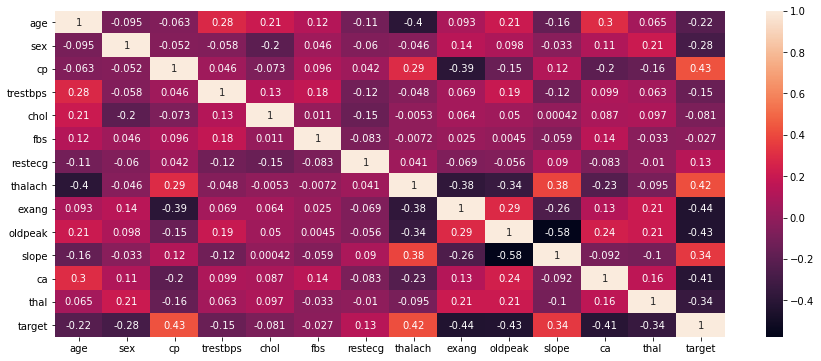

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(data2.corr(), annot=True)

In [18]:
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [19]:
data2['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

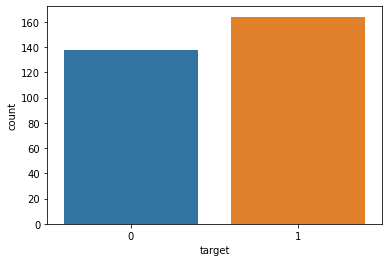

In [20]:
sns.countplot(x='target',data=data2)

In [21]:
data2['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

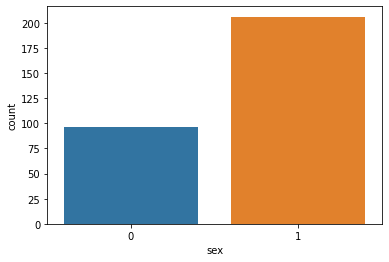

In [22]:
sns.countplot(x='sex', data=data2)

<AxesSubplot:xlabel='age', ylabel='count'>

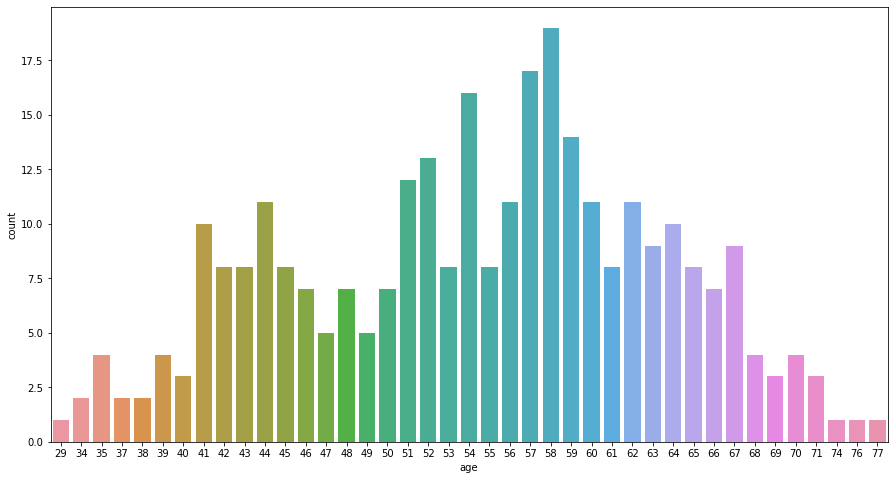

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x='age',data=data2)

# Let's find how many people have heart disease and how many people doesn't have heart disease?

In [59]:
data2.target.value_counts()

1    157
0    126
Name: target, dtype: int64

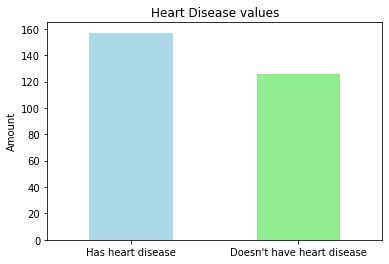

In [60]:
#plotting bar chart.
fig = data2.target.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen'])
fig.set_xticklabels(labels=['Has heart disease', "Doesn't have heart disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Amount");

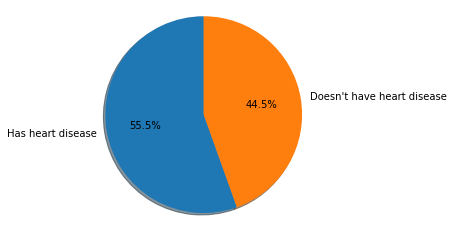

In [61]:
#visualizing in Pie chart
labels = "Has heart disease", "Doesn't have heart disease"
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data2.target.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Now let's check how many Male and Female are in the dataset

In [58]:
data2.sex.value_counts()

1    198
0     85
Name: sex, dtype: int64

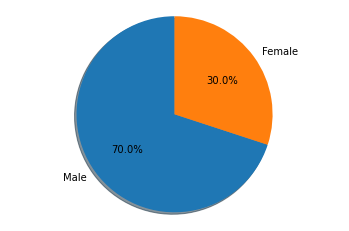

In [62]:
#visualizing in Pie chart
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data2.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Let's find People of which sex has most heart disease?

In [65]:
pd.crosstab(data2.target, data2.sex)

sex,0,1
target,,
0,17,109
1,68,89


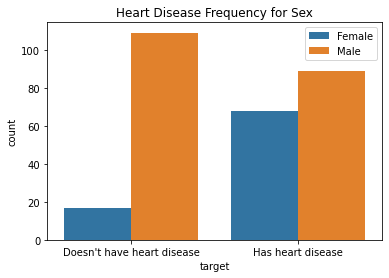

In [67]:
fig = sns.countplot(x = 'target', data = data2, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

# Let's find people of which sex has which type of chest pain most?

In [68]:
#counting values for different chest pain
data2.cp.value_counts()

0    132
2     82
1     49
3     20
Name: cp, dtype: int64

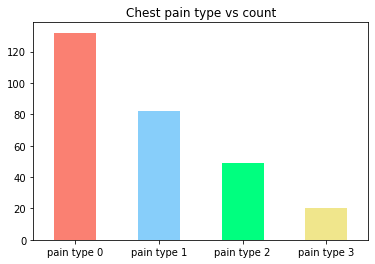

In [69]:
#plotting a bar chart
fig = data2.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

plt.title('Chest pain type vs count');

In [70]:
pd.crosstab(data2.sex, data2.cp)

cp,0,1,2,3
sex,,,,
0,30,18,33,4
1,102,31,49,16


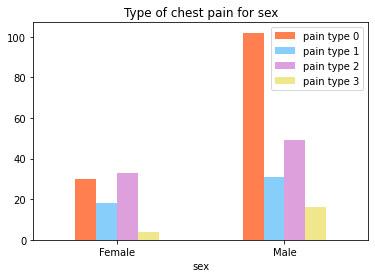

In [71]:
fig = pd.crosstab(data2.sex, data2.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

# Now let's find people with which chest pain are most pron to have heart disease?

In [72]:
pd.crosstab(data2.cp, data2.target)

target,0,1
cp,,
0,95,37
1,8,41
2,17,65
3,6,14


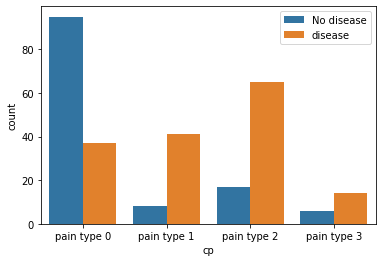

In [73]:
fig = sns.countplot(x = 'cp', data = data2, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

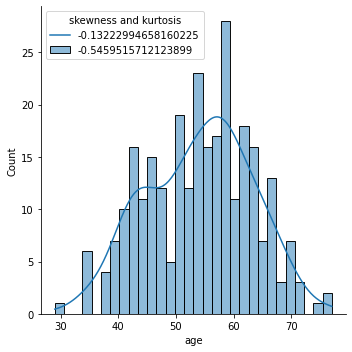

In [74]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = data2, bins = 30, kde = True)
skewness=str(data2["age"].skew())
kurtosis=str(data2["age"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

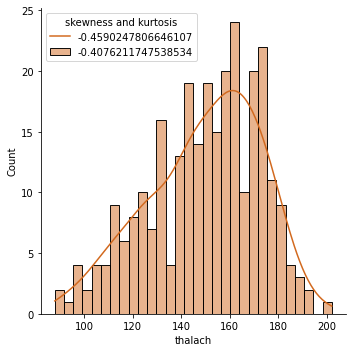

In [75]:
# Anpther plot for High rate Heart Disease
sns.displot(x = 'thalach', data = data2, bins = 30, kde = True, color = 'chocolate')
skewness=str(data2["thalach"].skew())
kurtosis=str(data2["thalach"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

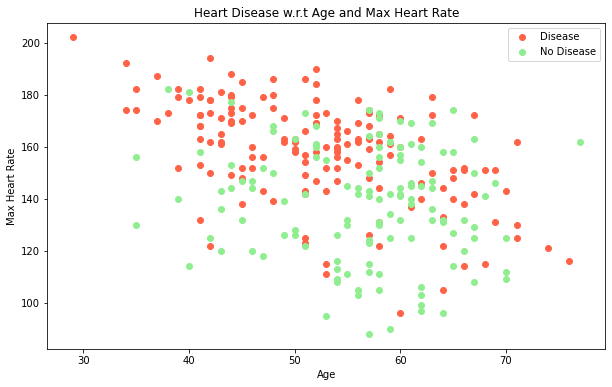

In [76]:
# Creating a figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(data2.age[data2.target==1], 
            data2.thalach[data2.target==1], 
            c="tomato")

#plotting the values for people who doesn't have heart disease
plt.scatter(data2.age[data2.target==0], 
            data2.thalach[data2.target==0], 
            c="lightgreen")

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

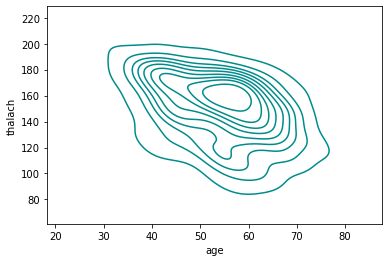

In [77]:
###Let's make a density curve for visualizing the distribution of age and thalach(Maximum Heart Rate) observations in our dataset
sns.kdeplot(x = 'age', y = 'thalach', data = data2, color = 'darkcyan');

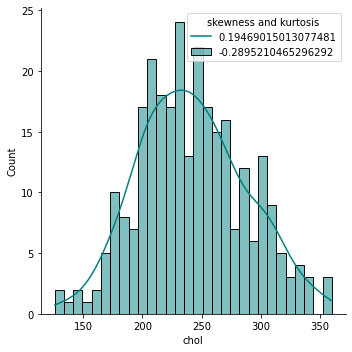

In [78]:
#Now, let's make a distribution plot for serum cholestoral
sns.displot(x = 'chol', data = data2, bins = 30, kde = True, color = 'teal')
skewness=str(data2['chol'].skew())
kurtosis=str(data2['chol'].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));

In [79]:
#Now let's find People of which sex has more exercise induced angina?
pd.crosstab(data2.exang, data2.sex)

sex,0,1
exang,,
0,70,123
1,15,75


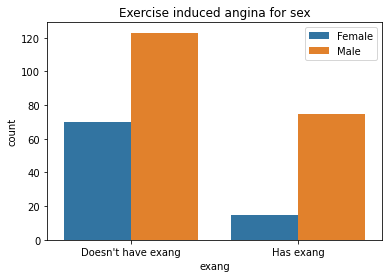

In [80]:
fig = sns.countplot(x = 'exang', data = data2, hue = 'sex')
plt.title('Exercise induced angina for sex')
fig.set_xticklabels(labels=["Doesn't have exang", 'Has exang'], rotation=0)
plt.legend(['Female', 'Male']);

In [81]:
#Which sex of people has more fasting blood sugar > 120 mg/dl?
data2.fbs.value_counts()

0    244
1     39
Name: fbs, dtype: int64

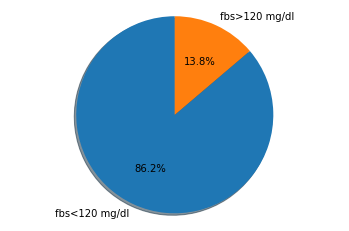

In [82]:
#visualizing in Pie chart
labels = 'fbs<120 mg/dl', 'fbs>120 mg/dl'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data2.fbs.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

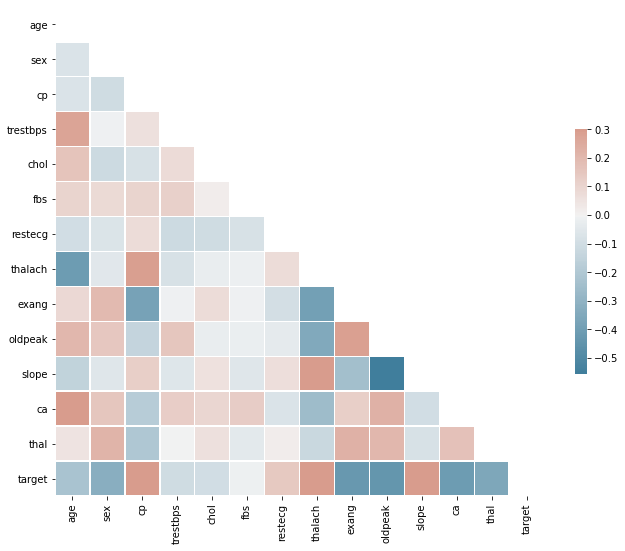

In [83]:
corr = data2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Checking & Removing Outliers

<AxesSubplot:>

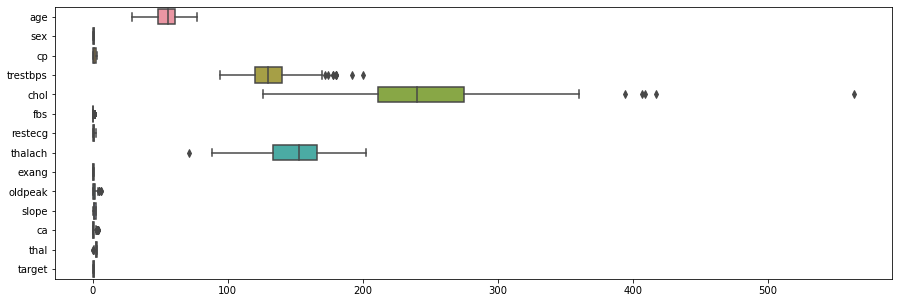

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data2,orient='h')

In [25]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x20218629580>,
 'caps': [<matplotlib.lines.Line2D at 0x20218629c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x20218629220>],
 'medians': [<matplotlib.lines.Line2D at 0x20218634340>],
 'fliers': [<matplotlib.lines.Line2D at 0x202186346a0>],
 'means': []}

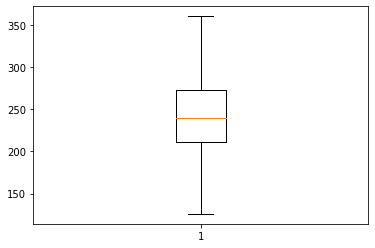

In [27]:
q1 = data2.chol.quantile(0.25)
q3 = data2.chol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
k1=data2[data2["chol"]>upper_limit]
data2=data2[data2["chol"]<upper_limit]
plt.boxplot(data2["chol"])

In [28]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.282828,0.693603,0.966330,131.531987,243.272727,0.148148,0.535354,149.468013,0.329966,1.028620,1.400673,0.710438,2.309764,0.542088
std,9.047966,0.461775,1.032681,17.638252,44.996731,0.355846,0.525944,23.078446,0.470994,1.156805,0.618739,1.001852,0.613755,0.499066
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='trestbps'>

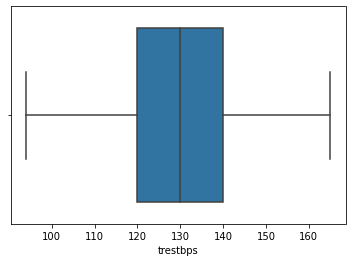

In [29]:
q1 = data2.trestbps.quantile(0.25)
q3 = data2.trestbps.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
data2[data2["trestbps"] > upper_limit]
data2=data2[data2["trestbps"] < upper_limit]
sns.boxplot(data2["trestbps"])

<AxesSubplot:xlabel='thalach'>

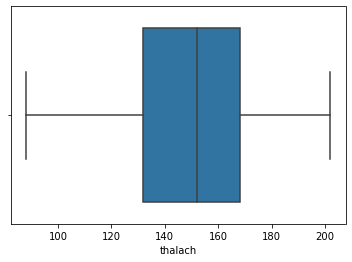

In [30]:
q1 = data2.thalach.quantile(0.25)
q3 = data2.thalach.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
data2[data2["thalach"] < lower_limit]
data2=data2[data2["thalach"] > lower_limit]
sns.boxplot(data2["thalach"])

<AxesSubplot:>

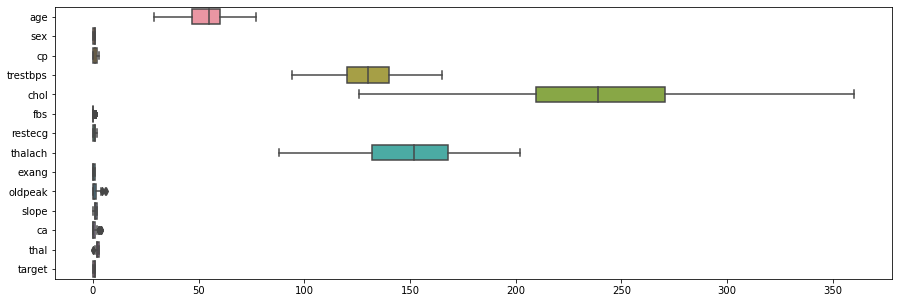

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data2,orient='h')

In [32]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.000000,0.699647,0.964664,129.438163,242.070671,0.137809,0.537102,149.671378,0.318021,0.999293,1.420495,0.720848,2.296820,0.554770
std,9.113547,0.459224,1.020441,14.784944,44.890275,0.345310,0.520367,22.861163,0.466533,1.126628,0.610084,1.008733,0.610392,0.497872
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
data2.shape

(283, 14)

<AxesSubplot:>

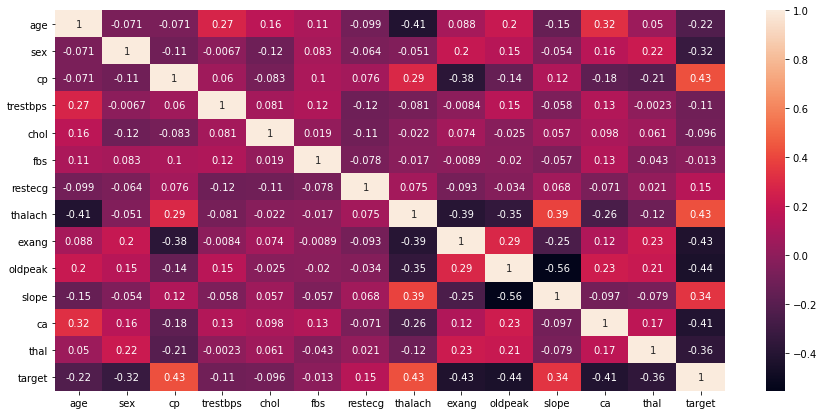

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(data2.corr(),annot=True)

# Data Splitting & Standardization

In [35]:
x = data2.drop('target',axis=1)
y = data2['target']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train, x_test

(array([[ 0.33870449,  0.65603334, -0.96528661, ..., -0.66426877,
          0.30960709, -2.08571429],
        [-1.07883651,  0.65603334,  1.054665  , ...,  0.94997577,
         -0.67590279, -0.47142857],
        [-0.75171167,  0.65603334, -0.96528661, ..., -0.66426877,
          0.30960709, -0.47142857],
        ...,
        [ 0.33870449,  0.65603334, -0.96528661, ..., -0.66426877,
          0.30960709,  1.14285714],
        [ 0.77487095,  0.65603334, -0.96528661, ..., -0.66426877,
          0.30960709, -0.47142857],
        [-0.20650359,  0.65603334,  1.054665  , ...,  0.94997577,
          3.26613673, -0.47142857]]),
 array([[ 0.01157964,  0.65603334, -0.96528661, -0.49543023,  0.94573559,
         -0.40613847, -1.03635106, -1.48573827,  1.47753125,  2.07856377,
         -0.66426877,  1.29511697, -0.47142857],
        [-1.40596136,  0.65603334,  1.054665  ,  0.05242167, -0.63278626,
         -0.40613847, -1.03635106,  0.77714355, -0.67680464,  0.9664973 ,
         -0.66426877, -0.675

# Model Evaluation

# Logistic Regression

In [38]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
lr_pred = lr.predict(x_test)
pd.DataFrame(np.c_[y_test,lr_pred],columns=['Actual','Predicted']).head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


 Test Accuracy score :  85.96 %
Train Accuracy score :  84.07 %
----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.88      0.88      0.88        32

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



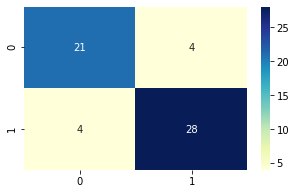

In [40]:
print(" Test Accuracy score : ",round(lr.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(lr.score(x_train,y_train)*100,2),"%")
print("----------------------")
print("Classification Report")
print("----------------------")
con = confusion_matrix(lr_pred,y_test)
plt.figure(figsize=(5,3))
sns.heatmap(con, annot=True,cmap="YlGnBu",fmt='g')
print(classification_report(y_test,lr_pred))

In [41]:
auc = roc_auc_score(y_test,lr_pred)
auc

0.8574999999999999

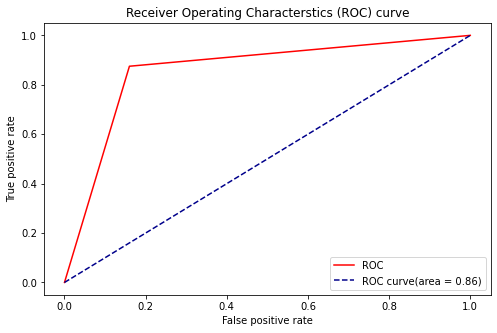

In [42]:
fpr, tpr, thresholds = roc_curve(y_test,lr_pred)
plt.figure(figsize=(8,5))
plt.plot(fpr , tpr , color='red',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

In [98]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 4)
log_clf.fit(x_train, y_train)
log_score = log_clf.score(x_test, y_test)
log_score

0.8596491228070176

In [99]:
from sklearn.model_selection import GridSearchCV
log_grid = {'C': np.logspace(-5, 5),
            'solver': ['liblinear'],
            'max_iter': np.arange(1000, 2000, 100),
            'penalty':['l1', 'l2']
           }

log_gscv = GridSearchCV(LogisticRegression(random_state = 7),
                          param_grid=log_grid,
                          cv=5,
                          verbose=True)

log_gscv.fit(x_train, y_train)
log_tuned_score = log_gscv.score(x_test, y_test)
log_tuned_score

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   10.2s finished


0.8771929824561403

# Random Forest

In [43]:
rfc = RandomForestClassifier(max_depth=2)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=2)

In [44]:
rfc_pred = rfc.predict(x_test)
pd.DataFrame(np.c_[y_test,rfc_pred],columns=['Actual','Predicted']).head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


 Test Accuracy score :  92.98 %
Train Accuracy score :  84.51 %
----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.94      0.94      0.94        32

    accuracy                           0.93        57
   macro avg       0.93      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



<AxesSubplot:>

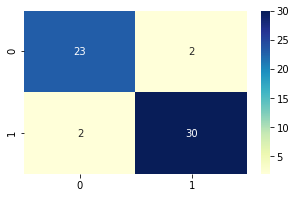

In [45]:
print(" Test Accuracy score : ",round(rfc.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(rfc.score(x_train,y_train)*100,2),"%")
clf_con = confusion_matrix(y_test,rfc_pred)
print("----------------------")
print("Classification Report")
print("----------------------")
print(classification_report(y_test,rfc_pred))
plt.figure(figsize=(5,3))
sns.heatmap(clf_con, annot=True,cmap="YlGnBu",fmt='g')

# Getting Accuracy Above 90%

In [46]:
auc = roc_auc_score(y_test,rfc_pred)
auc

0.92875

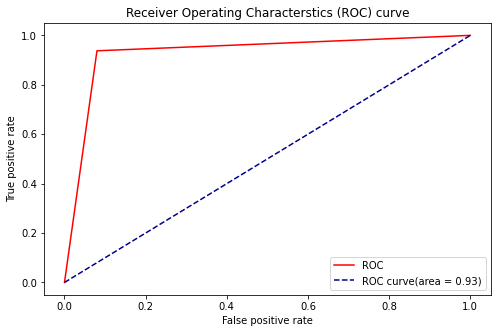

In [47]:
fpr, tpr, thresholds = roc_curve(y_test,rfc_pred)
plt.figure(figsize=(8,5))
plt.plot(fpr , tpr , color='red',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

In [100]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(n_estimators=1000, random_state = 35)
rand_clf.fit(x_train, y_train)
ranf_score = rand_clf.score(x_test, y_test)
ranf_score

0.8771929824561403

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_score = gbc.score(x_test, y_test)
gbc_score

0.8421052631578947

# Model Comparison

In [48]:
data = { 'Models' : ['Logistic Regression','Random Forest'],
         'Test Accuracy' : [round(lr.score(x_test,y_test)*100,2), round(rfc.score(x_test,y_test)*100,2)],
         'Train Accuracy': [round(lr.score(x_train,y_train)*100,2),round(rfc.score(x_train,y_train)*100,2)],
       }

df = pd.DataFrame(data)
df.sort_values(by='Test Accuracy',ascending=False)

,Models,Test Accuracy,Train Accuracy
1,Random Forest,92.98,84.51
0,Logistic Regression,85.96,84.07


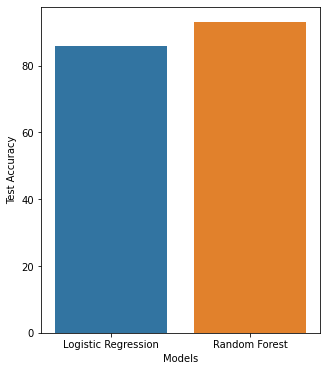

In [49]:
plt.figure(figsize = (5,6))
sns.barplot(x='Models', y='Test Accuracy',data=df)
plt.show()

# Data Testing

In [50]:
data2.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [51]:
sample1 = [50,0,1,120,244,0,1,162,0,1.1,2,0,2]
if rfc.predict([sample1]) == 0:
    print('[SAFE] HEART DISEASE NOT DETECTED')
else:
    print(' [WARNING] HEART DISEASE DETECTED')

[SAFE] HEART DISEASE NOT DETECTED


In [52]:
sample2 = [50,0,1,120,244,0,1,162,0,1.1,2,0,2]
if lr.predict([sample2]) == 0:
    print('[SAFE] HEART DISEASE NOT DETECTED')
else:
    print(' [WARNING] HEART DISEASE DETECTED')

 [WARNING] HEART DISEASE DETECTED


# Another Model for Better Accuracy

# KNeighbors Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
knn_score = knn_clf.score(x_test, y_test)
knn_score

0.9298245614035088

In [86]:
from sklearn.model_selection import GridSearchCV
knn_grid = {'n_neighbors': np.arange(2, 15),
            'leaf_size': [10, 15, 20, 25, 30, 35, 40, 45, 50],
            'p':[1,2,3,4,5], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree']}

knn_gscv = GridSearchCV(KNeighborsClassifier(),
                        param_grid=knn_grid,
                        cv=5,
                        verbose=True)

knn_gscv.fit(x_train, y_train)
knn_tuned_score = knn_gscv.score(x_test, y_test)
knn_tuned_score

Fitting 5 folds for each of 1755 candidates, totalling 8775 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8775 out of 8775 | elapsed:   54.4s finished


0.8947368421052632

In [88]:
knn_gscv.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'p': 2}

# Support Vector Classifier

In [89]:
from sklearn import svm
svc_clf = svm.SVC(random_state = 7)
svc_clf.fit(x_train, y_train)
svc_score = svc_clf.score(x_test, y_test)
svc_score

0.9122807017543859

In [94]:
from sklearn.model_selection import GridSearchCV
svc_grid = {'C': np.logspace(-5, 5, 20),
            'kernel': ['rbf'],
            'degree': [2,3,4]
           }

svc_gscv = GridSearchCV(svm.SVC(random_state = 31),
                        param_grid=svc_grid,
                        cv=5,
                        verbose=True)

svc_gscv.fit(x_train, y_train)
svc_tuned_score = svc_gscv.score(x_test, y_test)
svc_tuned_score

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished


0.8245614035087719

In [95]:
svc_gscv.best_params_

{'C': 6.1584821106602545, 'degree': 2, 'kernel': 'rbf'}

In [111]:
# create a dictionary with all scores
score = [{'Model':'Logistic Regression', 'Score': log_score, 'Tuned_score': log_tuned_score},
         {'Model':'Random Forest', 'Score': auc,'Tuned_score':gbc_score},
         {'Model':'SVC', 'Score': svc_score, 'Tuned_score': svc_tuned_score},
         {'Model':'KNN', 'Score': knn_score, 'Tuned_score': knn_tuned_score}]

# Let's view all model score as a dataframe to get a good overview

In [112]:
pd.DataFrame(score, columns=['Model','Score','Tuned_score'])

,Model,Score,Tuned_score
0,Logistic Regression,0.859649,0.877193
1,Random Forest,0.928750,0.842105
2,SVC,0.912281,0.824561
3,KNN,0.929825,0.894737


# ----------------------------------------------THE END-----------------------------------------------------